## Working with Maps.

In [2]:
%pip install folium
import folium
import pandas as pd
import numpy as np

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ------------ --------------------------- 30.7/100.0 kB 1.3 MB/s eta 0:00:01
   --------------- ----------------------- 41.0/100.0 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 718.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 82.0/82.0 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Here, we import the data and prepare it to use it.

In [5]:


Geo_Data = f"Drone_Delivery/map.geojson"

Geo_Unified_Data = f"Drone_Delivery/merged_regions.json"

Population_Data = f"Drone_Delivery/wellbeing.xlsx"

Area_Data = f"Drone_Delivery/wellbeing-toronto-demographics.xlsx"


Reg_1 = f"Drone_Delivery/maps/1.json"

Reg_2 = f"Drone_Delivery/maps/2.json"

Reg_3 = f"Drone_Delivery/maps/3.json"

Reg_4 = f"Drone_Delivery/maps/4.json"

 


my_sheet_1 = '016 Pop_TotalChange' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
my_sheet_2 = 'RawData-Ref Period 2011'

data_population = pd.read_excel(Population_Data, sheet_name = my_sheet_1)
data_area = pd.read_excel(Area_Data, sheet_name = my_sheet_2) 


df_population = pd.DataFrame(data_population, columns= ['HoodID','Pop2016'])
df_area = pd.DataFrame(data_area, columns= ['Neighbourhood Id','Total Area'])

population_np = df_population.to_numpy()
area_np = df_area.to_numpy()  



# Evaluating the density:
density_np = np.zeros((len(population_np),2))
for i in range(len(population_np)):
  density_np[i,0] = population_np[i,0]
  density_np[i,1] = min(np.divide(population_np[i,1], area_np[i,1]), 22385)
  


df_density = pd.DataFrame({'ID': density_np[:, 0], 'Density': density_np[:, 1]})


### How to add a Circle to the figure?

In [6]:

m = folium.Map(
    location=[43.703397981700505, -79.43868786583936],
    tiles="cartodbpositron",
    zoom_start=12,
)


folium.CircleMarker(
    location=[43.68352142244174, -79.45183319483861],
    radius=5,
    popup="",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


folium.LayerControl().add_to(m)


m

In [7]:
m = folium.Map(
    location=[43.671595779599855, -79.42165614748306],
    zoom_start=12,
)

In [8]:
style_0 = {'fillColor': '#FFFFFF ', 'color': '#85C1E9' }

folium.GeoJson(Geo_Data, name="geojson", style_function=lambda x:style_0).add_to(m)


style_1 = {'fillColor': '#D91818 ', 'color': '#000000' }

folium.GeoJson(Reg_1, name="geojson", style_function=lambda x:style_1).add_to(m)

style_2 = {'fillColor': '#0E19CA  ', 'color': '#000000' }

folium.GeoJson(Reg_2, name="geojson", style_function=lambda x:style_2).add_to(m)


style_3 = {'fillColor': '#283747  ', 'color': '#000000' }
folium.GeoJson(Reg_3, name="geojson", style_function=lambda x:style_3).add_to(m)

style_4 = {'fillColor': '#F1C40F  ', 'color': '#000000' }
folium.GeoJson(Reg_4, name="geojson", style_function=lambda x:style_4).add_to(m)




folium.LayerControl().add_to(m)

m

In [9]:
m = folium.Map(
    location=[43.671595779599855, -79.42165614748306],
    #tiles="cartodbpositron",
    zoom_start=12,)


style = {'fillColor': '#E5E7E9', 'color': '#000000' }

folium.GeoJson(Geo_Unified_Data, name="geojson", style_function=lambda x:style).add_to(m)

folium.Choropleth(
    geo_data=Geo_Data,
    name="choropleth",
    data=df_density,
    columns=['ID', 'Density'],
    key_on="feature.properties.AREA_SHORT_CODE",
    fill_color="BuGn",
    fill_opacity=0.3,
    line_opacity=2,
    legend_name="Density (population per area)",
).add_to(m)
folium.LayerControl().add_to(m)

m

In [11]:
%pip install shapely
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 991.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
Polygon_points = {}
IDs = [110, 109, 107, 91, 92,
       106, 101, 94, 96, 97,
       93, 83, 80, 84, 81,
       95, 79, 78, 76, 75]
for i in IDs:
  Polygon_points[i] = []

Polygon_points[110] = [(330.2752293577976, -2697.247706422014),
                         (2018.3486238532075, -2165.1376146788957),
                         (2366.9724770642165, -2119.2660550458677),
                         (2504.5871559632983, -2073.3944954128406),
                         (2532.1100917431154, -2165.1376146788953),
                         (2660.5504587155915, -2513.761467889904),
                         (2779.816513761463, -3155.9633027522887),
                         (2889.9082568807285, -3431.1926605504527),
                         (2412.844036697244, -3596.3302752293516),
                         (2440.3669724770602, -3633.027522935774),
                         (1935.779816513758, -3788.990825688067),
                         (1908.2568807339417, -3743.1192660550396),
                         (1761.4678899082537, -3798.1651376146724),
                         (1715.5963302752266, -3752.2935779816453),
                         (1256.880733944952, -3339.449541284398)]

Polygon_points[109] = [(2495.4128440366935, -2073.3944954128406),
                         (2623.8532110091696, -1981.6513761467857),
                         (3880.733944954122, -1605.5045871559605),
                         (4311.926605504579, -3055.045871559628),
                         (2917.431192660545, -3486.238532110086),
                         (2779.816513761463, -3137.6146788990773),
                         (2669.724770642197, -2550.458715596326),
                         (2642.201834862381, -2422.018348623849),
                         (2532.1100917431154, -2165.1376146788957)]

Polygon_points[107] = [(3880.733944954122, -1605.5045871559605),
                         (5128.440366972468, -1220.1834862385301),
                         (5366.9724770642115, -2036.6972477064185),
                         (5431.1926605504505, -2155.96330275229),
                         (5495.412844036688, -2477.064220183482),
                         (5651.376146788982, -2513.7614678899045),
                         (5908.256880733935, -3467.889908256875),
                         (5266.055045871551, -3669.724770642196),
                         (4623.8532110091655, -3844.0366972477),
                         (4394.4954128440295, -3045.871559633022),
                         (4311.92660550458, -3064.220183486233),
                         (4036.697247706415, -2146.7889908256843)]

Polygon_points[91] = [(1761.4678899082537, -3798.165137614673),
                        (1908.256880733942, -3743.119266055039),
                        (1944.9541284403635, -3788.9908256880676),
                        (2422.018348623849, -3642.2018348623797),
                        (2403.6697247706375, -3587.155963302746),
                        (2889.9082568807285, -3431.1926605504536),
                        (3238.5321100917386, -4128.44036697247),
                        (3302.752293577976, -4311.92660550458),
                        (3376.1467889908204, -4422.018348623846),
                        (3660.55045871559, -4706.422018348616),
                        (3908.2568807339385, -5137.614678899074),
                        (3990.825688073388, -5376.146788990818),
                        (2944.954128440362, -5385.321100917422),
                        (2128.4403669724734, -4238.532110091736)]

Polygon_points[92] = [(2917.4311926605455, -3486.238532110086),
                        (4385.321100917424, -3045.871559633022),
                        (4623.853211009166, -3844.0366972477),
                        (5256.880733944945, -3669.724770642196),
                        (5284.403669724761, -3743.1192660550396),
                        (5238.5321100917345, -3761.4678899082505),
                        (5467.8899082568705, -4422.018348623846),
                        (5091.743119266046, -4495.412844036689),
                        (4908.256880733938, -4587.155963302745),
                        (3770.642201834856, -4871.559633027515),
                        (3669.724770642196, -4715.596330275222),
                        (3477.06422018348, -4532.110091743111),
                        (3376.1467889908195, -4422.018348623846),
                        (3311.926605504582, -4330.275229357791),
                        (3238.532110091738, -4128.440366972471)]

Polygon_points[106] = [(5128.440366972469, -1229.3577981651354),
                         (6256.880733944943, -899.0825688073379),
                         (6935.779816513749, -3201.834862385315),
                         (6862.385321100906, -3220.1834862385267),
                         (6467.8899082568705, -3357.798165137609),
                         (6449.541284403659, -3311.926605504582),
                         (6339.4495412843935, -3348.6238532110037),
                         (6348.623853210998, -3394.495412844031),
                         (6201.834862385311, -3431.192660550453),
                         (6165.137614678889, -3403.669724770636),
                         (5917.4311926605415, -3495.4128440366912),
                         (5642.201834862375, -2504.5871559632983),
                         (5495.412844036687, -2467.889908256878),
                         (5440.366972477055, -2174.3119266055014),
                         (5366.9724770642115, -2036.6972477064185)]

Polygon_points[101] = [(6256.880733944943, -899.0825688073379),
                         (7660.550458715584, -486.2385321100909),
                         (7825.688073394482, -1119.2660550458695),
                         (8146.788990825674, -1275.2293577981632),
                         (8256.88073394494, -1678.8990825688047),
                         (8467.889908256868, -1623.8532110091714),
                         (8614.678899082553, -2192.660550458712),
                         (7504.587155963291, -2532.1100917431154),
                         (7532.110091743106, -2697.247706422014),
                         (7477.0642201834735, -2733.9449541284353),
                         (7559.633027522923, -3036.697247706417),
                         (7412.844036697235, -3064.220183486233),
                         (7412.844036697236, -3110.091743119261),
                         (6954.12844036696, -3211.009174311921)]

Polygon_points[94] = [(5256.880733944945, -3669.724770642196),
                        (5899.08256880733, -3467.889908256875),
                        (5926.605504587146, -3504.587155963297),
                        (6183.486238532099, -3394.4954128440313),
                        (6201.834862385311, -3449.5412844036637),
                        (6348.623853210998, -3394.495412844031),
                        (6348.623853210998, -3348.6238532110037),
                        (6458.715596330264, -3321.1009174311876),
                        (6458.715596330264, -3357.798165137609),
                        (6862.385321100906, -3211.009174311921),
                        (6935.77981651375, -3229.357798165132),
                        (7293.577981651363, -4495.41284403669),
                        (5541.284403669716, -4981.65137614678),
                        (5385.321100917421, -4440.366972477058),
                        (5467.8899082568705, -4422.018348623846),
                        (5247.706422018339, -3779.8165137614615),
                        (5284.403669724762, -3743.1192660550396)]

Polygon_points[96] = [(6944.954128440356, -3220.1834862385263),
                        (7412.844036697235, -3110.091743119261),
                        (7412.844036697235, -3064.2201834862326),
                        (7559.633027522923, -3036.697247706417),
                        (7477.0642201834735, -2724.7706422018305),
                        (7541.2844036697115, -2697.247706422014),
                        (7504.587155963291, -2532.1100917431154),
                        (8422.018348623838, -2256.8807339449504),
                        (8908.25688073393, -3944.954128440361),
                        (8770.642201834848, -4036.697247706415),
                        (8587.155963302737, -4128.44036697247),
                        (7293.577981651364, -4486.238532110084)]

Polygon_points[97] = [(8146.788990825674, -1275.229357798163),
                        (9009.17431192659, -1614.678899082566),
                        (9082.568807339434, -1605.5045871559605),
                        (9201.834862385303, -2385.321100917427),
                        (9559.63302752292, -3559.6330275229293),
                        (8908.25688073393, -3944.95412844036),
                        (8697.247706422004, -3266.0550458715543),
                        (8422.018348623838, -2256.8807339449504),
                        (8614.678899082555, -2192.6605504587124),
                        (8467.889908256868, -1623.8532110091714),
                        (8256.88073394494, -1688.07339449541)]

Polygon_points[93] = [(2944.9541284403617, -5385.321100917422),
                        (3990.825688073388, -5376.146788990817),
                        (3899.0825688073332, -5110.091743119257),
                        (3770.6422018348558, -4871.559633027515),
                        (4871.559633027515, -4596.330275229349),
                        (5091.743119266046, -4495.41284403669),
                        (5385.321100917422, -4440.366972477056),
                        (5541.284403669714, -4981.651376146781),
                        (6605.504587155951, -4688.073394495405),
                        (6935.77981651375, -5871.559633027513),
                        (3917.431192660544, -6770.642201834851)]

Polygon_points[83] = [(3908.2568807339385, -6770.64220183485),
                        (5871.559633027513, -6192.660550458705),
                        (6174.311926605494, -7201.834862385308),
                        (5816.513761467881, -7302.75229357797),
                        (5752.293577981642, -7275.229357798153),
                        (5220.183486238523, -7431.192660550446),
                        (5284.403669724762, -7688.0733944954),
                        (4770.642201834854, -7642.201834862372),
                        (4486.238532110085, -7577.981651376134)]

Polygon_points[80] = [(5880.733944954119, -6192.660550458705),
                        (6935.77981651375, -5871.559633027513),
                        (7633.027522935767, -5669.724770642192),
                        (7954.12844036696, -6816.513761467877),
                        (7256.880733944942, -7018.3486238532),
                        (6880.733944954116, -6990.8256880733825),
                        (6174.311926605495, -7192.660550458703)]

Polygon_points[84] = [(4486.238532110084, -7568.8073394495295),
                        (4770.642201834854, -7642.201834862372),
                        (5275.229357798155, -7688.0733944954),
                        (5220.183486238524, -7431.192660550446),
                        (5761.467889908247, -7284.4036697247575),
                        (5816.513761467881, -7302.75229357797),
                        (6174.311926605494, -7192.660550458703),
                        (6651.376146788979, -8917.431192660535),
                        (6431.192660550447, -8899.082568807324),
                        (6100.917431192649, -8779.816513761454),
                        (4871.559633027515, -7981.651376146775)]

Polygon_points[81] = [(6174.311926605495, -7201.834862385308),
                        (6871.559633027511, -6981.651376146777),
                        (7247.7064220183365, -7018.348623853199),
                        (7954.128440366959, -6816.513761467878),
                        (7990.825688073381, -6862.385321100906),
                        (8321.10091743118, -8055.045871559618),
                        (6550.45871559632, -8541.28440366971)]

Polygon_points[95] = [(6605.504587155952, -4688.073394495405),
                        (8660.550458715583, -4100.917431192654),
                        (9559.633027522917, -3550.458715596324),
                        (9972.477064220167, -4990.825688073387),
                        (6935.77981651375, -5871.559633027513)]

Polygon_points[79] = [(7633.027522935767, -5669.724770642193),
                        (9275.229357798149, -5192.660550458707),
                        (9357.798165137598, -5550.458715596321),
                        (9293.57798165136, -5651.376146788982),
                        (9366.972477064202, -5944.954128440357),
                        (9440.366972477048, -6146.788990825678),
                        (9614.678899082552, -6321.100917431182),
                        (9623.853211009158, -6376.1467889908145),
                        (7963.302752293565, -6816.513761467878),
                        (7761.467889908244, -6110.091743119256)]

Polygon_points[78] = [(7963.302752293565, -6816.513761467878),
                        (9623.853211009158, -6366.97247706421),
                        (9981.651376146774, -7559.633027522923),
                        (8321.10091743118, -8055.045871559619),
                        (7990.825688073382, -6871.559633027511)]

Polygon_points[76] = [(9284.403669724754, -5192.660550458707),
                        (9972.477064220167, -4981.651376146781),
                        (10926.605504587136, -8091.7431192660415),
                        (10816.513761467872, -8192.6605504587),
                        (10155.963302752276, -8376.146788990813),
                        (9908.256880733928, -7587.155963302739),
                        (9981.651376146774, -7559.633027522923),
                        (9614.678899082552, -6330.275229357787),
                        (9440.366972477048, -6155.963302752283),
                        (9357.798165137598, -5935.77981651375),
                        (9302.752293577967, -5724.7706422018255),
                        (9302.752293577967, -5623.853211009165),
                        (9357.798165137598, -5541.284403669716)]

Polygon_points[75] = [(9981.651376146774, -4990.825688073387),
                        (10587.155963302735, -4807.339449541276),
                        (11357.798165137596, -7467.889908256869),
                        (11458.715596330256, -7743.119266055034),
                        (10926.605504587136, -8091.7431192660415)]




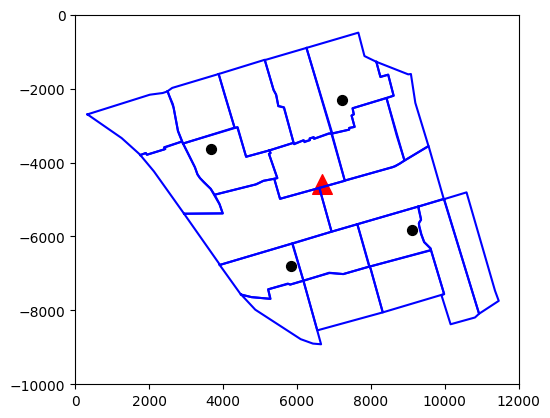

In [13]:
for id in IDs:
  p = Polygon(Polygon_points[id])
  x,y = p.exterior.xy
  plt.plot(x,y, color = 'b')


plt.xlim(0,12000)
plt.ylim(-10000,0)

plt.scatter(3669.724770642196, -3633.027522935774, s = 50, c='k')

plt.scatter(5834.862385321091, -6788.990825688062, s = 50, c='k')

plt.scatter(7229.357798165125, -2311.926605504583, s = 50, c='k')

plt.scatter(9100.917431192645, -5834.862385321091, s = 50, c='k')

plt.scatter(6678.899082568796, -4568.807339449534, s = 200, c='r', marker = '^')


plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [14]:
#depot centers 

3669.724770642196, -3633.027522935774 #NW 1

7229.357798165125, -2311.926605504583 #NE 2

5834.862385321091, -6788.990825688062 #SW 3

9100.917431192645, -5834.862385321091 #SE 4

#center
6678.899082568796, 4568.807339449534

(6678.899082568796, 4568.807339449534)

## Population of sub-regions and the corresponding probabilities

In [15]:
Total_area = 0
population = {}
for id in IDs:

  population[id] = population_np[id-1][1]
  Total_area += area_np[id-1][1]

print(Total_area)
print(population)

##################

Pr_sub = {}
for i in range(4):
  Pr_sub[i] = []
  ids = IDs[i*5: (i+1)*5]
  for id in ids:
    Pr_sub[i].append(population[int(id)])
  Pr_sub[i] = list(Pr_sub[i] / sum(Pr_sub[i]))





print('Probabilities in each region = \n {}'.format(Pr_sub))

36.29999999999999
{110: 11058, 109: 9955, 107: 21210, 91: 11098, 92: 14133, 106: 14365, 101: 10732, 94: 14349, 96: 10968, 97: 12528, 93: 36625, 83: 11785, 80: 13826, 84: 15559, 81: 16556, 95: 30526, 79: 7607, 78: 17945, 76: 25797, 75: 31340}
Probabilities in each region = 
 {0: [0.16393394016663207, 0.14758205591958964, 0.31443650487739794, 0.16452693687550035, 0.20952056216088], 1: [0.22822598582822282, 0.17050618029296813, 0.22797178354675735, 0.17425566394458392, 0.19904038638746782], 2: [0.38817818571080326, 0.1249059363440769, 0.14653792752594036, 0.16490551239520515, 0.1754724380239743], 3: [0.26962858278496665, 0.06719074327606765, 0.158503731837654, 0.22785849931546173, 0.27681844278584994]}


In [16]:
a = [Pr_sub[i][y] for i in range(4) for y in range(5)]
a = a / sum(a)
print(a)
print(sum(a))
np.save('prrr',a)

[0.04098349 0.03689551 0.07860913 0.04113173 0.05238014 0.0570565
 0.04262655 0.05699295 0.04356392 0.0497601  0.09704455 0.03122648
 0.03663448 0.04122638 0.04386811 0.06740715 0.01679769 0.03962593
 0.05696462 0.06920461]
1.0000000000000002


## Region Probability

In [17]:

Pr_region = {}
Tot_pop = sum([population[id] for id in IDs])
for d in range(4):
  ids = IDs[d*5: (d+1)*5]
  Pr_region[d] = sum([population[id] for id in ids])/Tot_pop


print(Pr_region)

{0: 0.1995904865043999, 1: 0.18623987312183027, 2: 0.2791763571052367, 3: 0.33499328326853317}
